In [45]:
import pandas as pd
import xmltodict
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger

In [3]:
input_path = './export.xml'
with open(input_path, 'r') as xml_file:
    input_data = xmltodict.parse(xml_file.read())

In [4]:
records_list = input_data['HealthData']['Record']

In [5]:
df = pd.DataFrame(records_list)

In [11]:
df['@sourceName']

0               Gustavo’s iPhone
1               Gustavo’s iPhone
2               Gustavo’s iPhone
3               Gustavo’s iPhone
4               Gustavo’s iPhone
                   ...          
811113    Apple Watch de Gustavo
811114    Apple Watch de Gustavo
811115    Apple Watch de Gustavo
811116    Apple Watch de Gustavo
811117    Apple Watch de Gustavo
Name: @sourceName, Length: 811118, dtype: object

In [14]:
gustavo_iphone = df[df['@sourceName'] == 'Gustavo’s iPhone']

In [15]:
gustavo_iphone

,@type,@sourceName,@sourceVersion,@unit,@creationDate,@startDate,@endDate,@value,@device,MetadataEntry,HeartRateVariabilityMetadataList
0,HKQuantityTypeIdentifierHeight,Gustavo’s iPhone,12.1.4,cm,2019-02-28 09:02:37 -0300,2019-02-28 09:02:37 -0300,2019-02-28 09:02:37 -0300,171,NaN,NaN,NaN
1,HKQuantityTypeIdentifierHeight,Gustavo’s iPhone,12.1.4,cm,2019-03-26 15:44:54 -0300,2019-03-26 15:44:54 -0300,2019-03-26 15:44:54 -0300,171,NaN,NaN,NaN
2,HKQuantityTypeIdentifierHeight,Gustavo’s iPhone,12.1.4,cm,2019-04-01 17:54:28 -0300,2019-04-01 17:54:28 -0300,2019-04-01 17:54:28 -0300,171,NaN,NaN,NaN
3,HKQuantityTypeIdentifierHeight,Gustavo’s iPhone,12.1.4,cm,2019-04-03 09:54:54 -0300,2019-04-03 09:54:54 -0300,2019-04-03 09:54:54 -0300,171,NaN,NaN,NaN
4,HKQuantityTypeIdentifierHeight,Gustavo’s iPhone,12.1.4,cm,2019-04-13 22:49:13 -0300,2019-04-13 22:49:13 -0300,2019-04-13 22:49:13 -0300,171,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
797694,HKQuantityTypeIdentifierFlightsClimbed,Gustavo’s iPhone,12.4.1,count,2019-10-28 16:48:12 -0300,2019-10-28 16:34:41 -0300,2019-10-28 16:34:43 -0300,1,"<<HKDevice: 0x2826eab70>, name:iPhone, manufac...",NaN,NaN
797695,HKQuantityTypeIdentifierFlightsClimbed,Gustavo’s iPhone,12.4.1,count,2019-10-28 17:01:48 -0300,2019-10-28 16:50:50 -0300,2019-10-28 16:50:53 -0300,1,"<<HKDevice: 0x2826eac10>, name:iPhone, manufac...",NaN,NaN
797697,HKQuantityTypeIdentifierFlightsClimbed,Gustavo’s iPhone,12.4.1,count,2019-10-28 18:16:24 -0300,2019-10-28 18:05:24 -0300,2019-10-28 18:05:54 -0300,4,"<<HKDevice: 0x2826eada0>, name:iPhone, manufac...",NaN,NaN
797698,HKQuantityTypeIdentifierFlightsClimbed,Gustavo’s iPhone,12.4.1,count,2019-10-28 19:49:47 -0300,2019-10-28 19:39:18 -0300,2019-10-28 19:39:21 -0300,1,"<<HKDevice: 0x2826eae40>, name:iPhone, manufac...",NaN,NaN


In [23]:
gustavo_watch = df[df['@sourceName'] == 'Apple Watch de Gustavo']

In [22]:
gustavo_watch

,@type,@sourceName,@sourceVersion,@unit,@creationDate,@startDate,@endDate,@value,@device,MetadataEntry,HeartRateVariabilityMetadataList


In [31]:
gustavo_iphone.loc[:, '@value'] = pd.to_numeric(
    gustavo_iphone.loc[:, '@value'])

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [32]:
gustavo_iphone.dtypes

@type                                object
@sourceName                          object
@sourceVersion                       object
@unit                                object
@creationDate                        object
@startDate                           object
@endDate                             object
@value                              float64
@device                              object
MetadataEntry                        object
HeartRateVariabilityMetadataList     object
dtype: object

In [35]:
total_steps = gustavo_iphone['@value']
total_steps.sum()


934181.993763448

In [37]:
format = '%Y-%m-%d %H:%M:%S %z'
gustavo_iphone['@creationDate'] = pd.to_datetime(df['@creationDate'],
                                     format=format)
gustavo_iphone['@startDate'] = pd.to_datetime(df['@startDate'],
                                  format=format)
gustavo_iphone['@endDate'] = pd.to_datetime(df['@endDate'],
                                format=format)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [38]:
gustavo_iphone.dtypes

@type                                                               object
@sourceName                                                         object
@sourceVersion                                                      object
@unit                                                               object
@creationDate                       datetime64[ns, pytz.FixedOffset(-180)]
@startDate                          datetime64[ns, pytz.FixedOffset(-180)]
@endDate                            datetime64[ns, pytz.FixedOffset(-180)]
@value                                                             float64
@device                                                             object
MetadataEntry                                                       object
HeartRateVariabilityMetadataList                                    object
dtype: object

In [51]:
steps_grouped = gustavo_iphone.groupby('@creationDate').sum()
daily_steps = steps_grouped['@value'].resample('D').sum()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


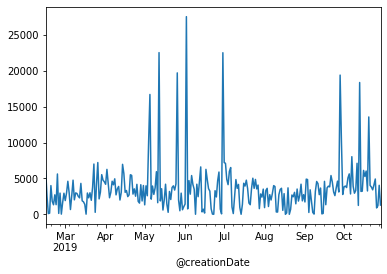

In [52]:
daily_steps.plot()

In [54]:
daily_steps.sort_values(ascending=False)[:10]

@creationDate
2019-06-02 00:00:00-03:00    27548.774970
2019-05-12 00:00:00-03:00    22537.955154
2019-06-30 00:00:00-03:00    22520.061430
2019-05-26 00:00:00-03:00    19712.263571
2019-09-28 00:00:00-03:00    19402.946782
2019-10-13 00:00:00-03:00    18371.576924
2019-05-05 00:00:00-03:00    16701.227381
2019-10-20 00:00:00-03:00    13568.387147
2019-09-29 00:00:00-03:00    10256.950711
2019-05-04 00:00:00-03:00    10084.543206
Name: @value, dtype: float64

In [56]:
monthly_steps = daily_steps.resample('M').mean()
monthly_steps.sort_values(ascending=False)[:10]

@creationDate
2019-10-31 00:00:00-03:00    4769.856405
2019-05-31 00:00:00-03:00    4472.214687
2019-06-30 00:00:00-03:00    4252.671694
2019-09-30 00:00:00-03:00    3759.014229
2019-04-30 00:00:00-03:00    3682.736945
2019-07-31 00:00:00-03:00    3488.457958
2019-03-31 00:00:00-03:00    3078.207457
2019-08-31 00:00:00-03:00    2240.504630
2019-02-28 00:00:00-03:00    2224.169686
Name: @value, dtype: float64

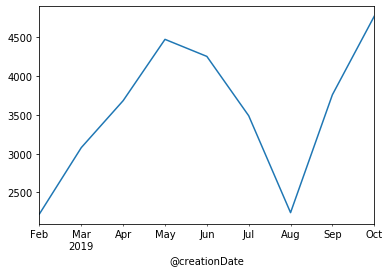

In [57]:
monthly_steps.plot()